In [6]:
# Imports principales para el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import streamlit as st
import holidays


In [22]:
# Cargar los datos de ventas y competencias desde data/raw/entrenamiento
ventas_path = "../data/raw/entrenamiento/ventas.csv"
competencia_path = "../data/raw/entrenamiento/competencia.csv"

# Cargar los archivos CSV en DataFrames
ventas_df = pd.read_csv(ventas_path)
competencia_df = pd.read_csv(competencia_path)

# Mostrar las primeras filas para verificar
print("Ventas:")
print(ventas_df.head())
print("\nCompetencias:")
print(competencia_df.head())

Ventas:
        fecha producto_id                            nombre categoria  \
0  2021-10-25    PROD_001          Nike Air Zoom Pegasus 40   Running   
1  2021-10-25    PROD_002              Adidas Ultraboost 23   Running   
2  2021-10-25    PROD_003               Asics Gel Nimbus 25   Running   
3  2021-10-25    PROD_004  New Balance Fresh Foam X 1080v12   Running   
4  2021-10-25    PROD_005                Nike Dri-FIT Miler   Running   

         subcategoria  precio_base  es_estrella  unidades_vendidas  \
0  Zapatillas Running          115         True                  6   
1  Zapatillas Running          135         True                 10   
2  Zapatillas Running           85        False                  2   
3  Zapatillas Running           75        False                  2   
4        Ropa Running           35        False                  2   

   precio_venta  ingresos  
0        118.36    710.16  
1        136.82   1368.20  
2         84.93    169.86  
3         75.42    1

In [23]:
# --- REPORTE DE CALIDAD DE DATOS (DATA QUALITY) ---

print("1. VISIÓN GENERAL (Tipos de datos y memoria):")
ventas_df.info()
print("-" * 50)

print("\n2. CONTEO DE VALORES NULOS (Huecos vacíos):")
print(ventas_df.isnull().sum())
print("-" * 50)

print("\n3. FILAS DUPLICADAS (Repetidos):")
cantidad_duplicados = ventas_df.duplicated().sum()
print(f"Total duplicados encontrados: {cantidad_duplicados}")
print("-" * 50)

print("\n4. ESTADÍSTICAS DESCRIPTIVAS (Resumen matemático):")
# Esto muestra promedio, mín, máx para columnas numéricas
display(ventas_df.describe())

1. VISIÓN GENERAL (Tipos de datos y memoria):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              3552 non-null   object 
 1   producto_id        3552 non-null   object 
 2   nombre             3552 non-null   object 
 3   categoria          3552 non-null   object 
 4   subcategoria       3552 non-null   object 
 5   precio_base        3552 non-null   int64  
 6   es_estrella        3552 non-null   bool   
 7   unidades_vendidas  3552 non-null   int64  
 8   precio_venta       3552 non-null   float64
 9   ingresos           3552 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 253.3+ KB
--------------------------------------------------

2. CONTEO DE VALORES NULOS (Huecos vacíos):
fecha                0
producto_id          0
nombre               0
categoria            0
subcategor

,precio_base,unidades_vendidas,precio_venta,ingresos
count,3552.000000,3552.00000,3552.000000,3552.000000
mean,123.125000,4.87866,121.816546,605.972323
std,165.576753,6.31102,164.017963,1079.071192
min,20.000000,1.00000,19.000000,19.460000
25%,48.750000,2.00000,47.212500,131.535000
50%,72.500000,3.00000,71.810000,216.570000
75%,118.750000,5.00000,118.220000,639.637500
max,830.000000,85.00000,854.220000,14508.400000


In [24]:
# --- TRANSFORMACIÓN DE DATOS (DATA CASTING) ---

# 1. Conversión de Tipos (String -> Datetime)
ventas_df['fecha'] = pd.to_datetime(ventas_df['fecha'])
competencia_df['fecha'] = pd.to_datetime(competencia_df['fecha'])

# 2. Verificación de Integridad
print("-" * 40)
print("VERIFICACIÓN DE DTYPES:")
print(f"ventas_df['fecha']:      {ventas_df['fecha'].dtype}")
print(f"competencia_df['fecha']: {competencia_df['fecha'].dtype}")

----------------------------------------
VERIFICACIÓN DE DTYPES:
ventas_df['fecha']:      datetime64[ns]
competencia_df['fecha']: datetime64[ns]


In [19]:
ventas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              3552 non-null   datetime64[ns]
 1   producto_id        3552 non-null   object        
 2   nombre             3552 non-null   object        
 3   categoria          3552 non-null   object        
 4   subcategoria       3552 non-null   object        
 5   precio_base        3552 non-null   int64         
 6   es_estrella        3552 non-null   bool          
 7   unidades_vendidas  3552 non-null   int64         
 8   precio_venta       3552 non-null   float64       
 9   ingresos           3552 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 253.3+ KB


In [ ]:
# --- INTEGRACIÓN DE DATOS (MERGE/JOIN) ---

# Realizamos un 'Inner Join' entre ventas y competencia
# Utilizamos una llave compuesta (Composite Key): 'fecha' y 'producto_id'
df = pd.merge(
    ventas_df,
    competencia_df,
    how='inner',
    on=['fecha', 'producto_id']
)

# Verificación de la estructura resultante
print("--- DIMENSIONES DEL DATASET INTEGRADO ---")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
print("\n--- MUESTRA DE DATOS ---")
display(df.head())

--- DIMENSIONES DEL DATASET INTEGRADO ---
Filas: 3552, Columnas: 13

--- MUESTRA DE DATOS ---


,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,82.96,111.88,97.43
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,112.56,108.61,115.58
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,79.79,78.44,80.11
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,72.60,67.29,74.45
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,37.71,33.60,33.07


## Analisis Exploratorio Completo de 'df'
se presentan a continuacion distintos analisis

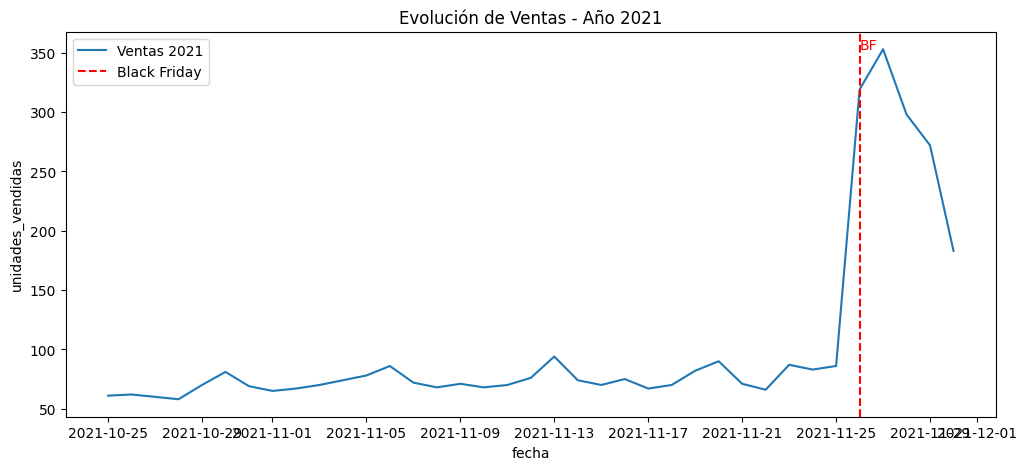

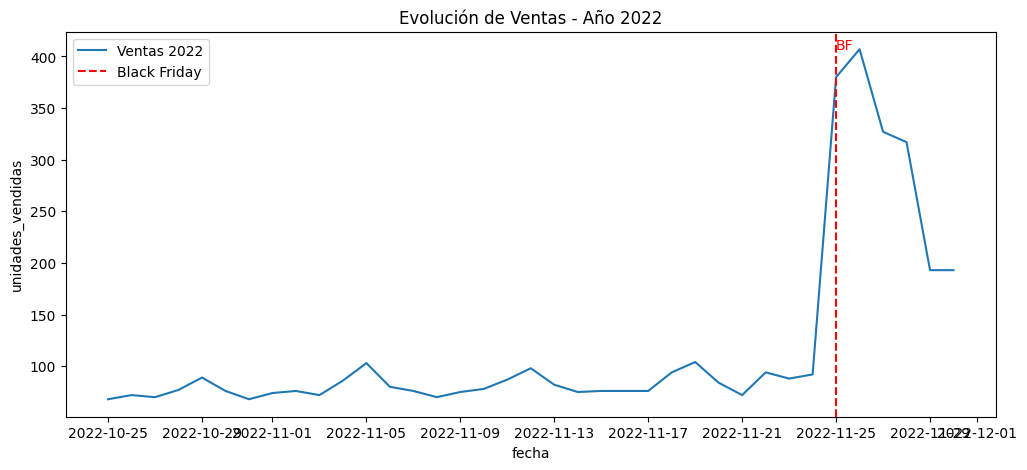

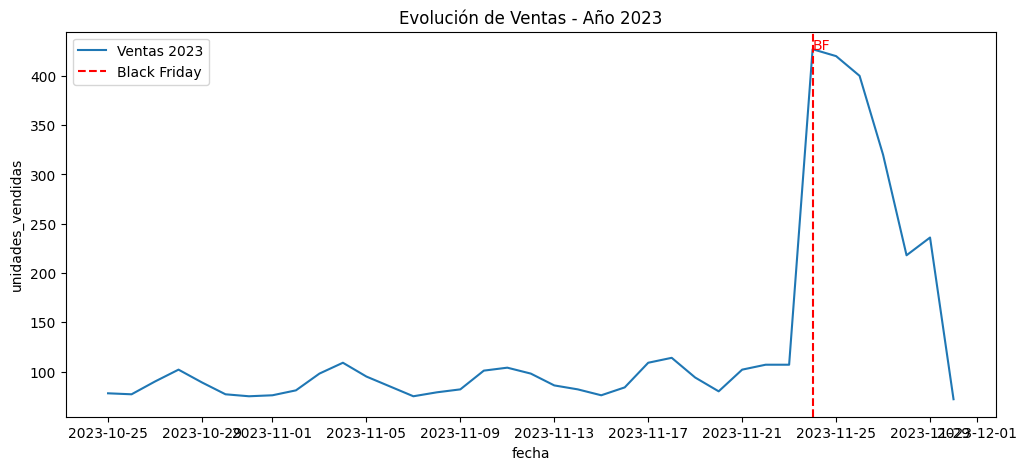

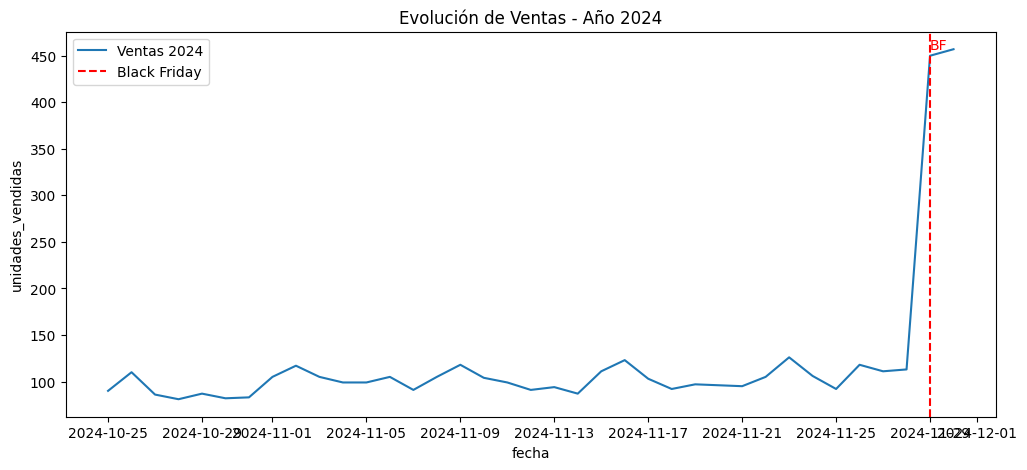

In [36]:
# --- ANÁLISIS TEMPORAL POR AÑO: LÍNEAS DE VENTAS Y BLACK FRIDAY ---
black_fridays = [
    '2019-11-29', '2020-11-27', '2021-11-26', 
    '2022-11-25', '2023-11-24', '2024-11-29'
]
df['anio'] = df['fecha'].dt.year
anios_disponibles = df['anio'].unique()
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for anio in anios_disponibles:
    df_anio = df[df['anio'] == anio]
    ventas_diarias = df_anio.groupby('fecha')['unidades_vendidas'].sum().reset_index()
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=ventas_diarias, x='fecha', y='unidades_vendidas', label=f'Ventas {anio}')
    for bf in black_fridays:
        bf_date = pd.to_datetime(bf)
        if bf_date.year == anio:
            plt.axvline(x=bf_date, color='red', linestyle='--', label='Black Friday')
            plt.text(bf_date, ventas_diarias['unidades_vendidas'].max(), 'BF', color='red')
    plt.title(f'Evolución de Ventas - Año {anio}')
    plt.legend()
    plt.show()

C:\Users\lucia\AppData\Local\Temp\ipykernel_28984\3296049100.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='dia_semana', y='unidades_vendidas', estimator='sum', order=orden_dias, palette='viridis')


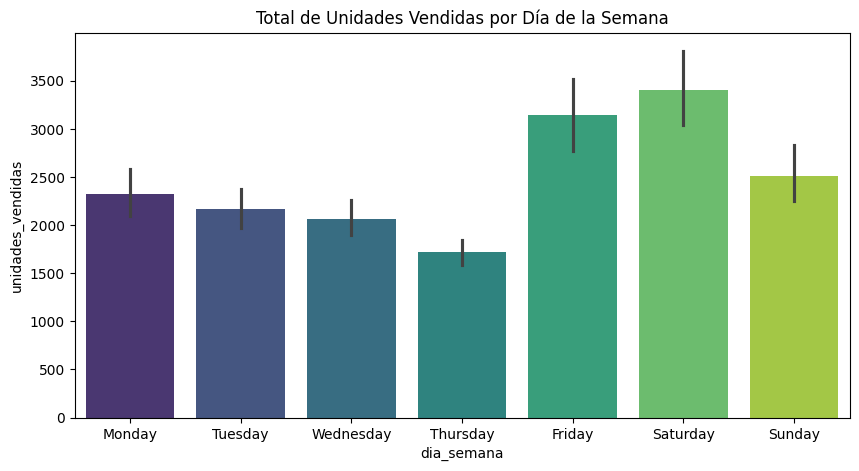

In [34]:
# --- ANÁLISIS POR DÍA DE LA SEMANA ---
df['dia_semana'] = df['fecha'].dt.day_name()
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='dia_semana', y='unidades_vendidas', estimator='sum', order=orden_dias, palette='viridis')
plt.title('Total de Unidades Vendidas por Día de la Semana')
plt.show()

C:\Users\lucia\AppData\Local\Temp\ipykernel_28984\3723267116.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='categoria', y='unidades_vendidas', estimator='sum', palette='magma')


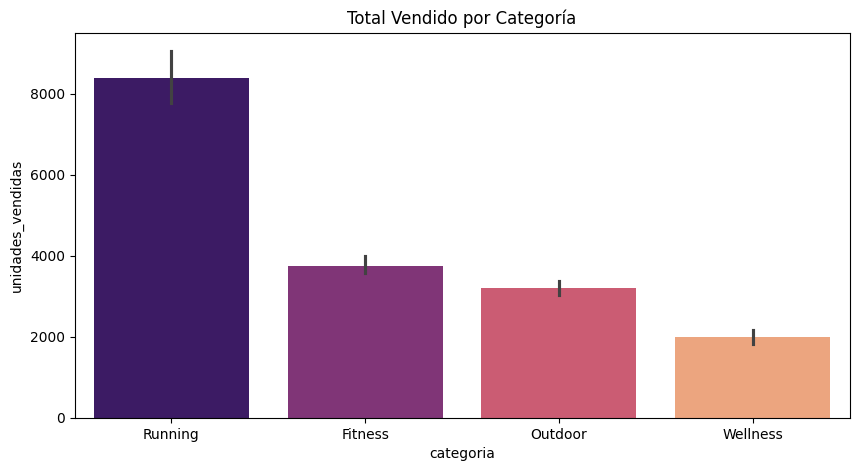

In [33]:
# --- ANÁLISIS POR CATEGORÍA ---
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='categoria', y='unidades_vendidas', estimator='sum', palette='magma')
plt.title('Total Vendido por Categoría')
plt.show()

C:\Users\lucia\AppData\Local\Temp\ipykernel_28984\2477888600.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='subcategoria', y='unidades_vendidas', estimator='sum', palette='rocket')


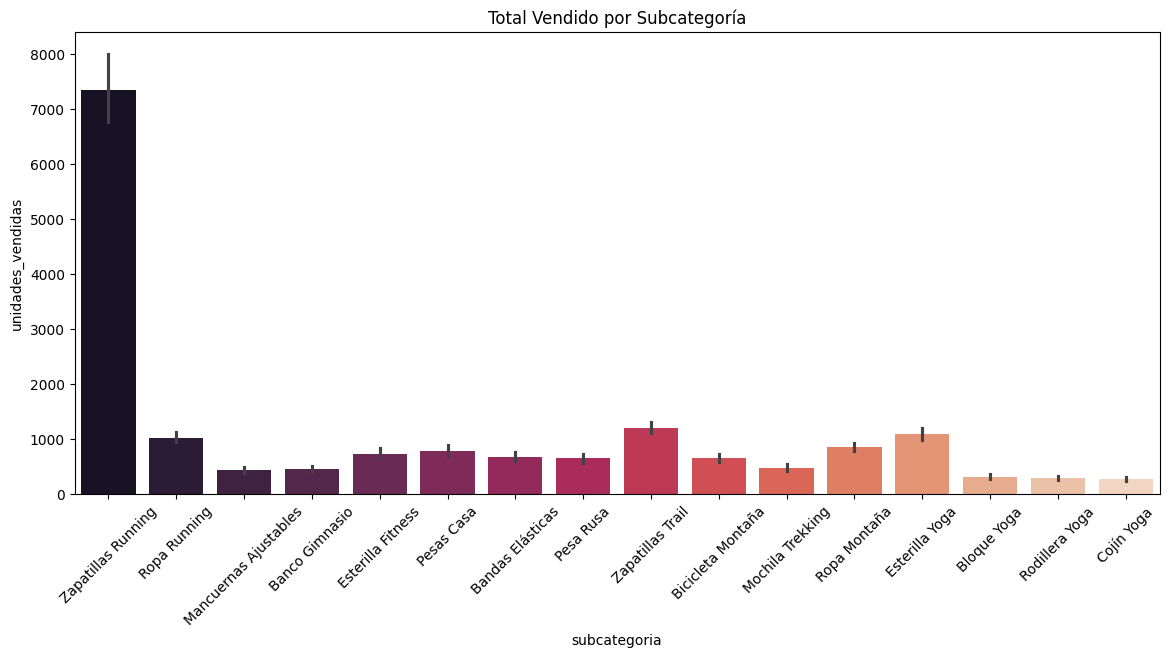

In [32]:
# --- ANÁLISIS POR SUBCATEGORÍA ---
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='subcategoria', y='unidades_vendidas', estimator='sum', palette='rocket')
plt.xticks(rotation=45)
plt.title('Total Vendido por Subcategoría')
plt.show()

C:\Users\lucia\AppData\Local\Temp\ipykernel_28984\3959836608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_productos, y='nombre', x='unidades_vendidas', palette='coolwarm')


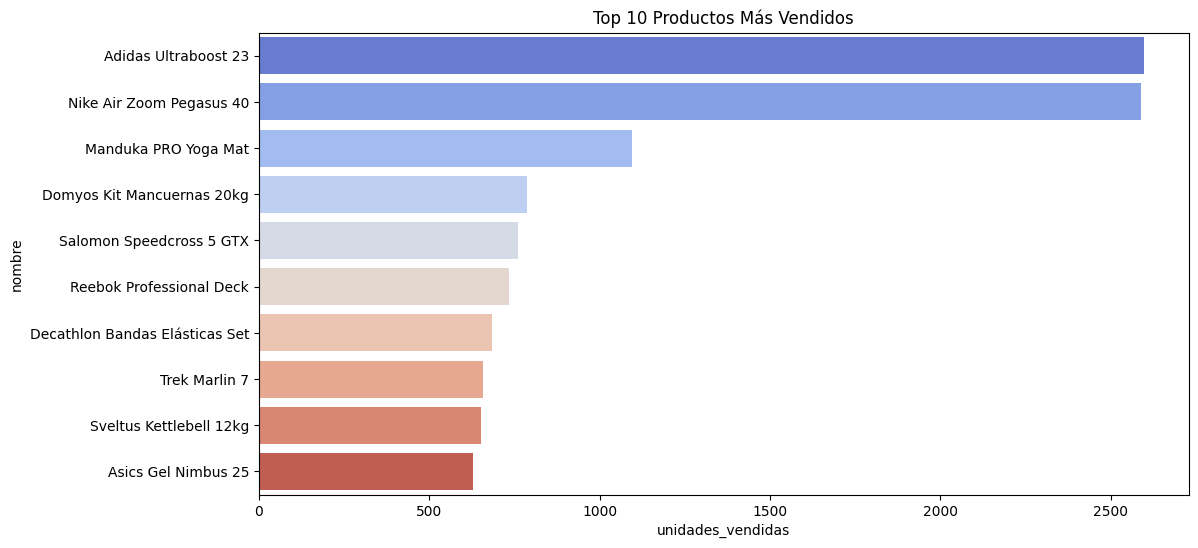

In [31]:
# --- ANÁLISIS DE TOP PRODUCTOS ---
# Agrupamos por nombre del producto y sumamos ventas
if 'nombre' in df.columns:
    top_productos = df.groupby('nombre')['unidades_vendidas'].sum().sort_values(ascending=False).head(10).reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_productos, y='nombre', x='unidades_vendidas', palette='coolwarm')
    plt.title('Top 10 Productos Más Vendidos')
    plt.show()
else:
    print("La columna 'nombre' no existe en el dataframe. Verifica el nombre correcto de la columna de productos.")

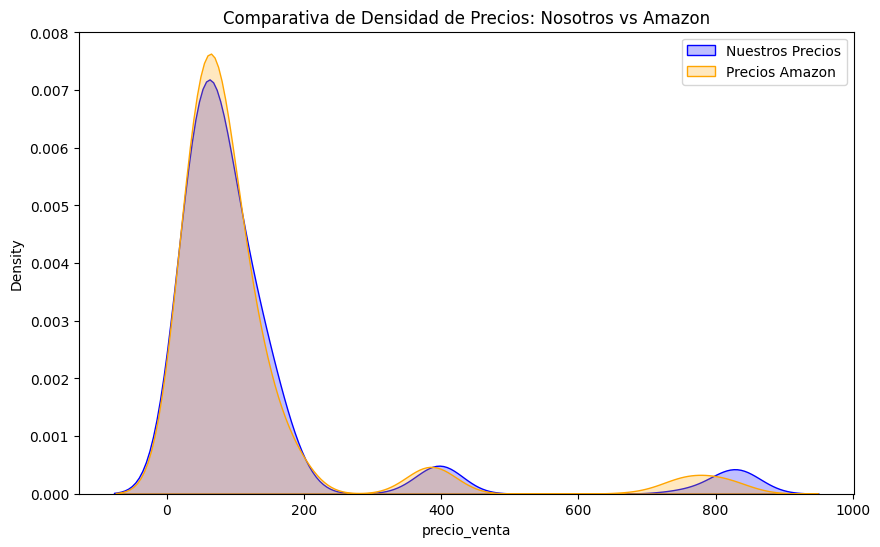

In [30]:
# --- ANÁLISIS DE DENSIDAD DE PRECIOS: NUESTROS VS AMAZON ---
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='precio_venta', fill=True, label='Nuestros Precios', color='blue')
sns.kdeplot(data=df, x='Amazon', fill=True, label='Precios Amazon', color='orange')
plt.title('Comparativa de Densidad de Precios: Nosotros vs Amazon')
plt.legend()
plt.show()